### MPG Data Discovery
* https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Linkten csv okuma

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                delimiter="\s+",
                header=None,
                names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"],
                 index_col='car name'
                )

df.shape

(398, 8)

In [7]:
df.columns
len(df.index)

398

In [8]:
len(set(df.index))

305

In [10]:
len(df.index.value_counts())

305

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


In [14]:
#null var mı?

df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [17]:
# mercedes geçen etiketler

df.filter(like="mercedes", axis=0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
mercedes-benz 280s,16.5,6,168.0,120.0,3820.0,16.7,76,2
mercedes benz 300d,25.4,5,183.0,77.00,3530.0,20.1,79,2
mercedes-benz 240d,30.0,4,146.0,67.00,3250.0,21.8,80,2


In [18]:
df.loc[["mercedes-benz 280s", "mercedes-benz 240d"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
mercedes-benz 280s,16.5,6,168.0,120.0,3820.0,16.7,76,2
mercedes-benz 240d,30.0,4,146.0,67.00,3250.0,21.8,80,2


#### horsepowera odaklanalım

In [47]:
pd.options.display.max_rows= 10#None

df.horsepower.value_counts()

#floata dönüşür mü?
#-----------
def isFloat(deger):
    try:
        deger = float(deger)
    except:
        return False
    else:
        return True    
#-----------

df.horsepower.map(isFloat) #False olarak floata dönüşemiyor.
floataDonusmeyenSatirlar = df.loc[~df.horsepower.map(isFloat),"horsepower"]
floataDonusmeyenSatirlar.value_counts()

floataDonusmeyenSatirlar

car name
ford pinto              ?
ford maverick           ?
renault lecar deluxe    ?
ford mustang cobra      ?
renault 18i             ?
amc concord dl          ?
Name: horsepower, dtype: object

#### ? olanlara Ortalama basalım

In [58]:
#df.horsepower.dtype

hp_mean = df[df.horsepower.map(isFloat)].horsepower.astype(float).mean()
hp_mean

#------------
#? olanlar
df.query("horsepower == '?'").horsepower
df.loc[~df.horsepower.map(isFloat),"horsepower"] = hp_mean

In [60]:
df = df.astype({"horsepower":"float"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 44.1+ KB


### Gruplama ve Görselleştirme

In [23]:
mpg = df.groupby(by='model year').agg({"mpg": ["max",'min','mean','count']})
mpg

mpg                       
             max   min       mean count
model year                             
70          27.0   9.0  17.689655    29
71          35.0  12.0  21.250000    28
72          28.0  11.0  18.714286    28
73          29.0  11.0  17.100000    40
74          32.0  13.0  22.703704    27
75          33.0  13.0  20.266667    30
76          33.0  13.0  21.573529    34
77          36.0  15.0  23.375000    28
78          43.1  16.2  24.061111    36
79          37.3  15.5  25.093103    29
80          46.6  19.1  33.696552    29
81          39.1  17.6  30.334483    29
82          44.0  22.0  31.709677    31

#### Pandas ile görselleştime

In [26]:
df_ozet = mpg.loc[:, ('mpg', ['max','min'])]
df_ozet

mpg      
             max   min
model year            
70          27.0   9.0
71          35.0  12.0
72          28.0  11.0
73          29.0  11.0
74          32.0  13.0
75          33.0  13.0
76          33.0  13.0
77          36.0  15.0
78          43.1  16.2
79          37.3  15.5
80          46.6  19.1
81          39.1  17.6
82          44.0  22.0

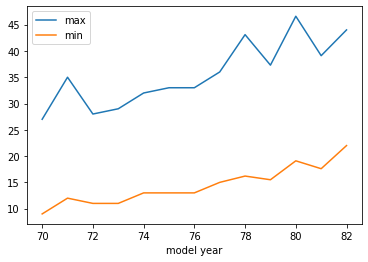

In [37]:
df_ozet['mpg'].plot(y=['max','min']);

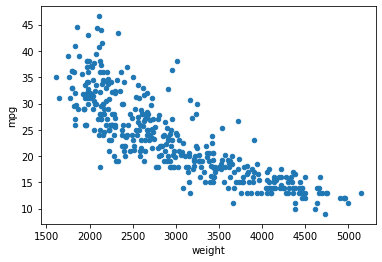

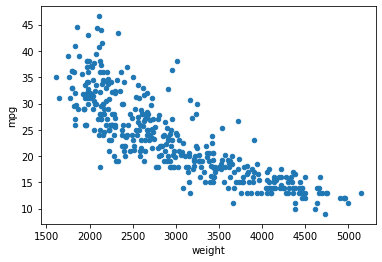

In [40]:
df.plot(x="weight", y="mpg", kind='scatter');
df.plot.scatter(x="weight", y="mpg");

### Matplotlib

C:\Users\ahmet\AppData\Local\Temp/ipykernel_18084/1529668034.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('En yüksek ağırlık',


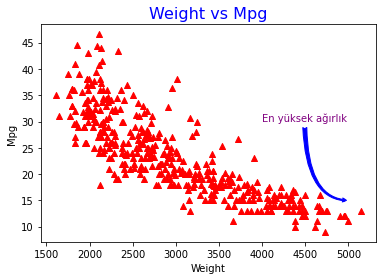

In [53]:
plt.scatter(x=df.weight, y=df.mpg, color='red', marker='^')

plt.title('Weight vs Mpg', fontsize=16, color='Blue')
plt.xlabel('Weight')
plt.ylabel('Mpg')

#text ekleyelim
plt.annotate('En yüksek ağırlık',
             xytext=(4000,30),
             xy=(5000,15),
             arrowprops={"facecolor":"red","arrowstyle":"fancy", "connectionstyle":"angle3", 'color':'blue'},
             color='purple'
            )
plt.show()

In [55]:
mpg = mpg.reset_index()

mpg

model year   mpg                       
                max   min       mean count
0          70  27.0   9.0  17.689655    29
1          71  35.0  12.0  21.250000    28
2          72  28.0  11.0  18.714286    28
3          73  29.0  11.0  17.100000    40
4          74  32.0  13.0  22.703704    27
5          75  33.0  13.0  20.266667    30
6          76  33.0  13.0  21.573529    34
7          77  36.0  15.0  23.375000    28
8          78  43.1  16.2  24.061111    36
9          79  37.3  15.5  25.093103    29
10         80  46.6  19.1  33.696552    29
11         81  39.1  17.6  30.334483    29
12         82  44.0  22.0  31.709677    31

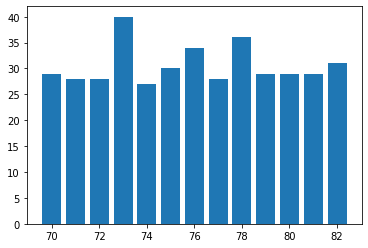

In [62]:
plt.bar(x=mpg['model year'], height=mpg.mpg['count']);

#### subplot ekleme

In [109]:
gr = df.groupby(by="cylinders").agg({"mpg":"count"}).rename(columns={"mpg":"adet"}).reset_index()
gr

,cylinders,adet
0,3,4
1,4,204
2,5,3
3,6,84
4,8,103


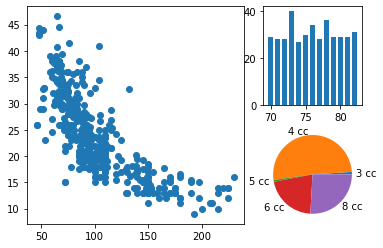

In [117]:
fig = plt.figure()

#
sp_15 = fig.add_subplot(2,3,(1,5))
sp_3 = fig.add_subplot(2,3,3)
sp_6 = fig.add_subplot(2,3,6)

#
sp_15.scatter(x=df.horsepower, y=df.mpg)
sp_3.bar(x=my_mpg["model year"], height=my_mpg.mpg["count"])
sp_6.pie(x=gr.adet, labels=["{} cc".format(c) for c in gr.cylinders])

plt.show()